In [7]:
import pandas as pd
import numpy as np

In [10]:
data = pd.read_csv("KwhConsumptionBlower78_1.csv",parse_dates= {'datetime':['TxnDate','TxnTime']})
data.head()

,datetime,Unnamed: 0,Consumption
0,2022-01-01 16:55:52,76229,1.010
1,2022-01-01 21:45:29,76258,0.908
2,2022-01-01 12:24:52,76287,0.926
3,2022-01-01 04:07:36,76316,0.928
4,2022-01-01 06:52:25,76345,0.916


In [11]:
data = data.drop("Unnamed: 0",axis=1)

In [12]:
data.head()

,datetime,Consumption
0,2022-01-01 16:55:52,1.010
1,2022-01-01 21:45:29,0.908
2,2022-01-01 12:24:52,0.926
3,2022-01-01 04:07:36,0.928
4,2022-01-01 06:52:25,0.916


In [14]:
print(f"min date: {data['datetime'].min()}, max date: {data['datetime'].max()}")
print(f"range: {data['datetime'].max()-data['datetime'].min()}")

min date: 2022-01-01 00:22:28, max date: 2022-01-20 23:47:55
range: 19 days 23:25:27


In [16]:
data.sort_values('datetime').rolling('1D',on='datetime').sum().head()

,datetime,Consumption
43,2022-01-01 00:22:28,1.030
19,2022-01-01 00:42:33,1.934
25,2022-01-01 01:01:51,2.838
11,2022-01-01 01:41:48,4.688
29,2022-01-01 02:22:52,6.566


In [23]:
daily_consumption = data.sort_values('datetime').rolling('1D',on='datetime').sum()
daily_consumption.head()

,datetime,Consumption
43,2022-01-01 00:22:28,1.030
19,2022-01-01 00:42:33,1.934
25,2022-01-01 01:01:51,2.838
11,2022-01-01 01:41:48,4.688
29,2022-01-01 02:22:52,6.566


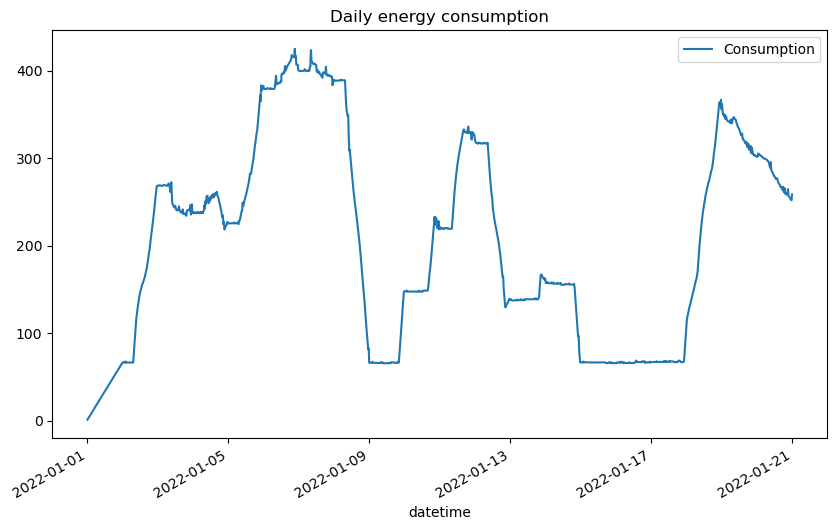

In [25]:
import matplotlib.pyplot as plt
daily_consumption.plot(x='datetime',y='Consumption',title="Daily energy consumption",figsize=(10,6))
plt.show()

In [31]:
hourly_consumption = data.sort_values('datetime').rolling('1H',on='datetime').sum()

<AxesSubplot:title={'center':'hourly energy consumption'}, xlabel='datetime'>

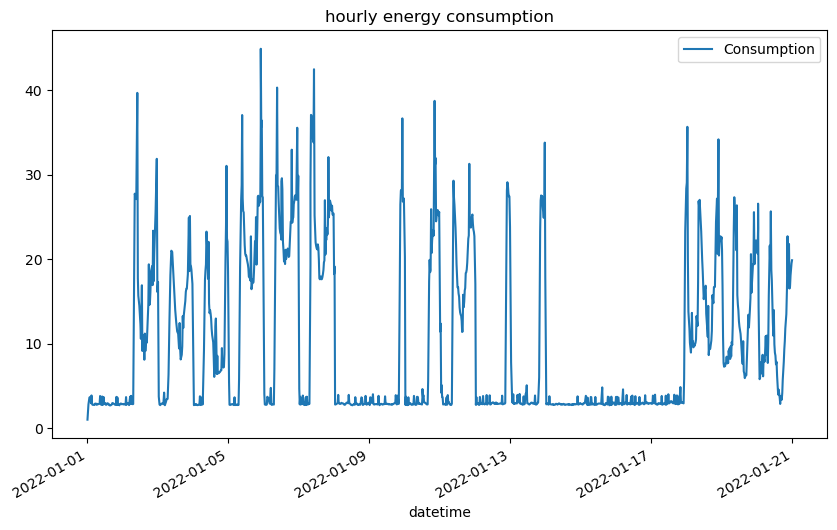

In [32]:
hourly_consumption.plot(x='datetime',y='Consumption',title="hourly energy consumption",figsize=(10,6))

In [70]:
df_copy = data.set_index('datetime').sort_index()
df_copy

,Consumption
datetime,
2022-01-01 00:22:28,1.030
2022-01-01 00:42:33,0.904
2022-01-01 01:01:51,0.904
2022-01-01 01:41:48,1.850
2022-01-01 02:22:52,1.878
...,...
2022-01-20 22:04:41,5.732
2022-01-20 22:26:36,5.928
2022-01-20 22:47:26,6.432


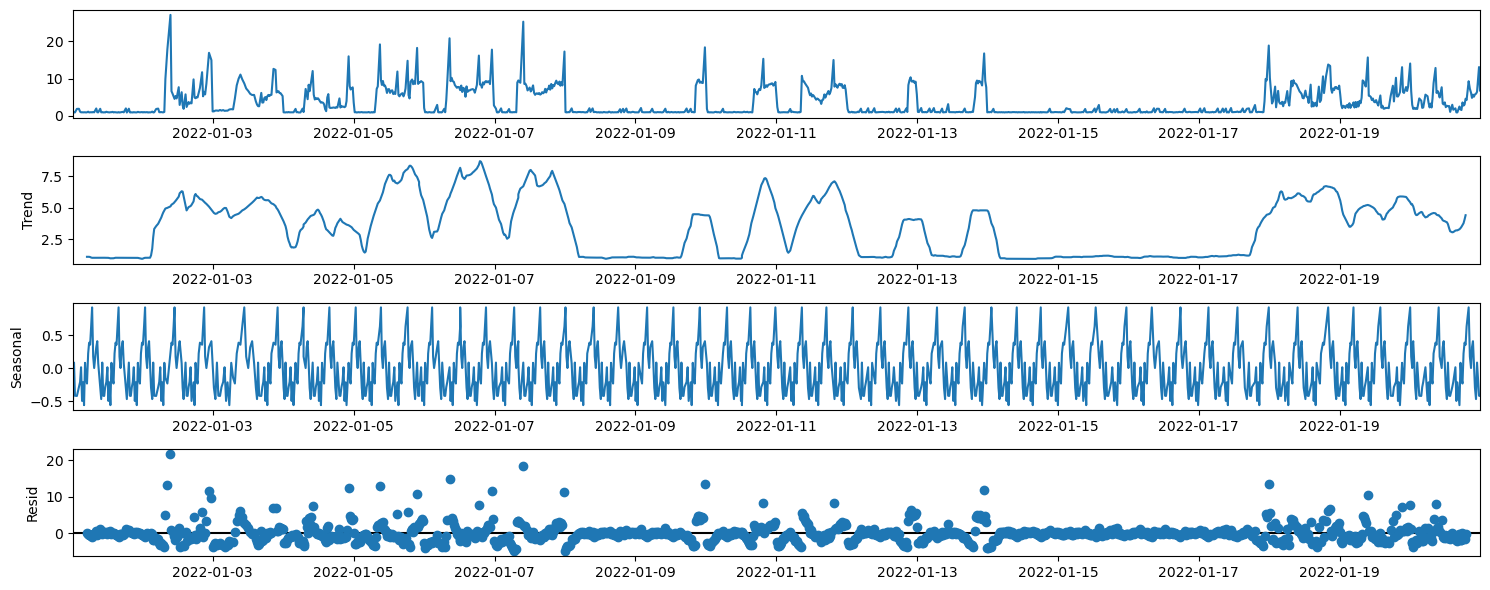

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_copy,model='additive',period=24)
plt.rc("figure", figsize=(15,6))
result.plot()
plt.show()

In [72]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_copy,order=(0,0,1))
model_fit = model.fit()

C:\Users\Srivatsan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Srivatsan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Srivatsan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [73]:
next_2_days = model_fit.predict()
next_2_days = next_2_days.iloc[-25:]
df_copy = df_copy.iloc[:-25]

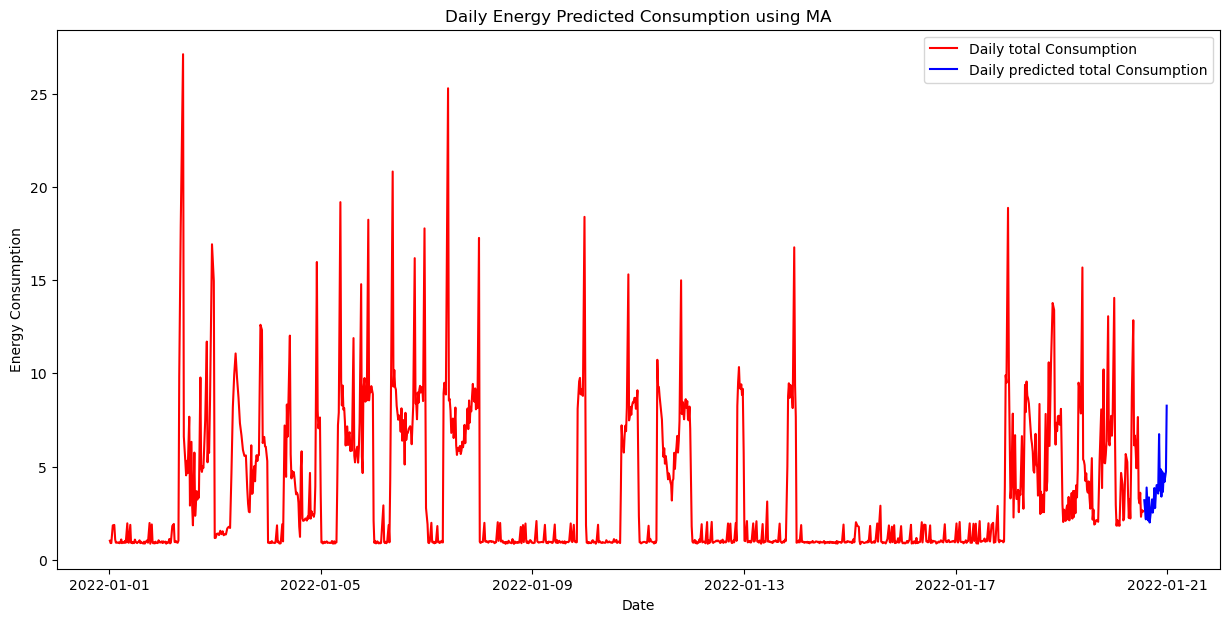

In [74]:
fig,ax= plt.subplots(1,1,figsize=(15,7))

ax.plot(df_copy['Consumption'],'r-',label='Daily total Consumption')
ax.plot(next_2_days,'b-',label='Daily predicted total Consumption')
ax.legend()
ax.set_title("Daily Energy Predicted Consumption using MA")
ax.set_xlabel("Date")
ax.set_ylabel("Energy Consumption")
plt.show()